In [1]:
import os

import pandas as pd
import numpy as ny

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
sns.set(context='notebook',style='darkgrid',palette='colorblind', font='sans-serif', font_scale=1, rc=None)

train=pd.read_csv('/Users/xuweiwei/Documents/kaggle/5_titanic/titanic/train.csv')
test=pd.read_csv('/Users/xuweiwei/Documents/kaggle/5_titanic/titanic/test.csv')

In [3]:
print(train.shape)
print(test.shape)
print(train.columns)
print(test.columns)

(891, 12)
(418, 11)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [7]:
train.isnull().sum()/train.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

Missed values discovering results:
Train Data:
    Age: 177/891 missed values (19.8% are missed).
    Cabin: 687/891 missed values (77.1% are missed).
    Embarked: 2/891 missed values.
Test Data:
    Age: 86/418 missed values (20.5% are missed).
    Cabin: 327/418 missed values (78.2% are missed).
    Fare: 1/418 missed values.
Insights: Now we know what are the missed values, And we are going to discover the correlations to do what is appropriate.

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

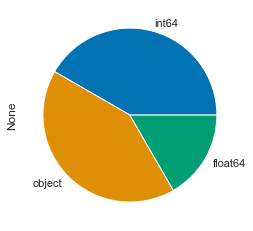

In [9]:
train.dtypes.value_counts().plot.pie()
test.isnull().sum()/test.shape[0]

In [10]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [20]:
#特征工程：通过可视化获取特征与结果之间的关联性
def feature_find(feature):
    fig,axis=plt.subplots(2,1,figsize=(12,9))
    #条形图
    sns.barplot(data=train,x=feature,y='Survived',ax=axis[0]).set_title(f'{feature} VS Survived')
    #直方图，看不同特征对于结果的分配
    sns.histplot(data=train,x=feature,hue='Survived',ax=axis[1], multiple = 'stack').set_title(f'{feature} VS Survived')
    # 返回比例值
    res=train[[feature,'Survived']].groupby([feature],as_index=False).mean().sort_values(by='Survived', ascending=False)
    return res

,Sex,Survived
0,female,0.742038
1,male,0.188908


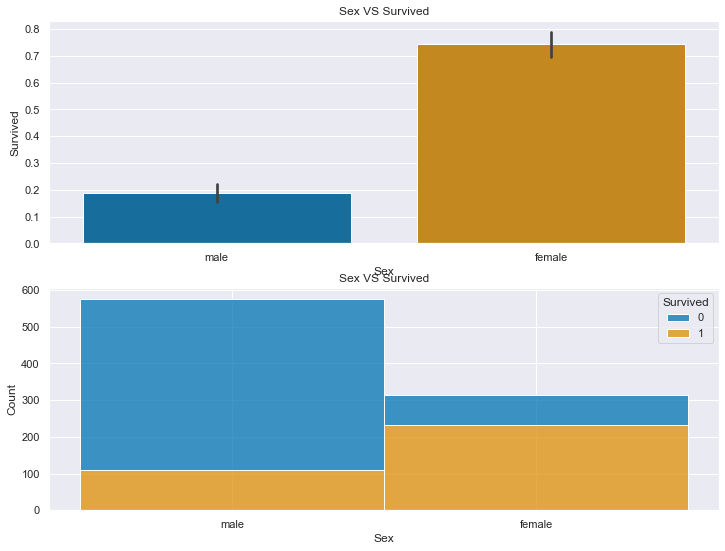

In [21]:
feature_find('Sex')

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


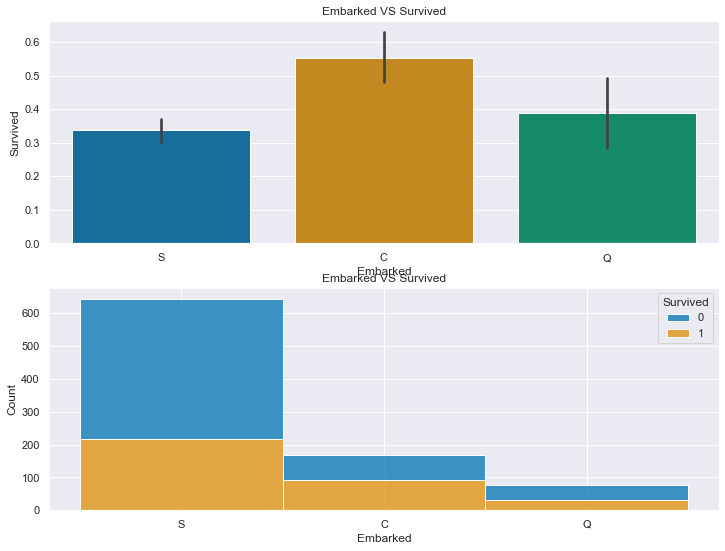

In [22]:
feature_find('Embarked')

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


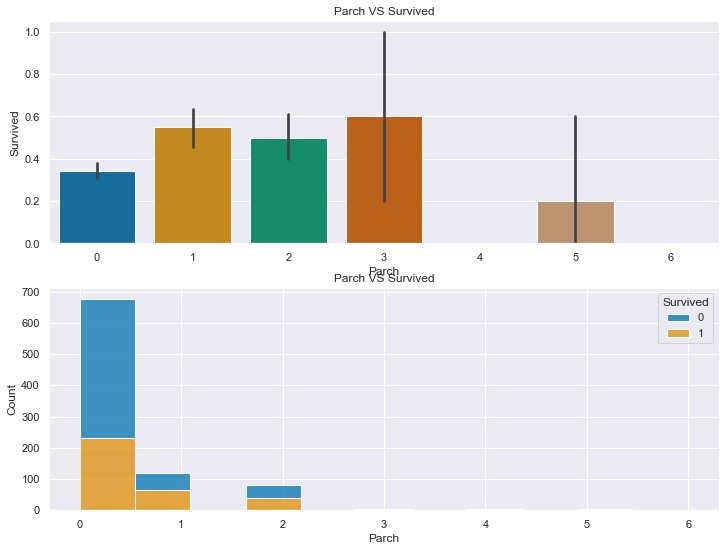

In [23]:
feature_find('Parch')

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


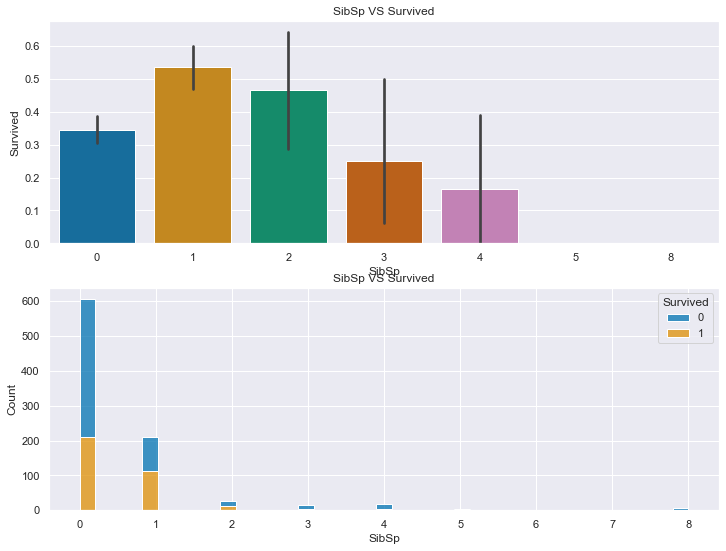

In [24]:
feature_find('SibSp')

<AxesSubplot:>

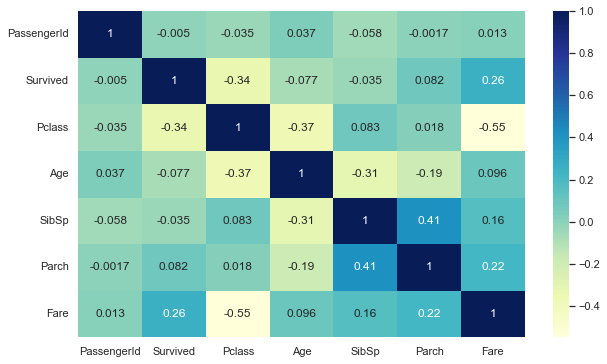

In [26]:
sns.set(rc = {'figure.figsize':(10,6)})
sns.heatmap(train.corr(), annot = True, fmt='.2g',cmap= 'YlGnBu')

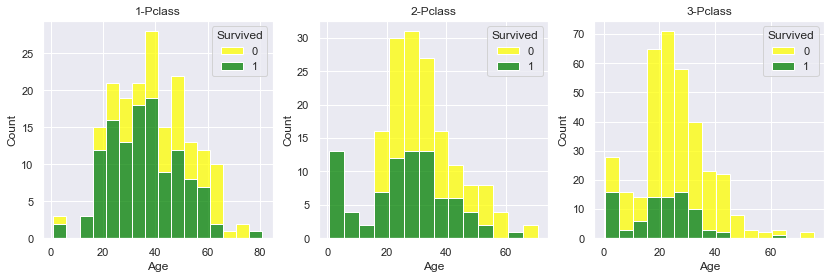

In [27]:
plot , ax = plt.subplots(1 , 3 , figsize=(14,4))
sns.histplot(data = train.loc[train["Pclass"]==1] , x = "Age" , hue = "Survived",binwidth=5,ax = ax[0],palette = sns.color_palette(["yellow" , "green"]),multiple = "stack").set_title("1-Pclass")
sns.histplot(data = train.loc[train["Pclass"]==2] , x = "Age" , hue = "Survived",binwidth=5,ax = ax[1],palette = sns.color_palette(["yellow" , "green"]),multiple = "stack").set_title("2-Pclass")
sns.histplot(data = train.loc[train["Pclass"]==3] , x = "Age" , hue = "Survived",binwidth=5,ax = ax[2],palette = sns.color_palette(["yellow" , "green"]),multiple = "stack").set_title("3-Pclass")
plt.show()

In [28]:
train.drop(columns = ["PassengerId"] , inplace = True)
combine = [train , test]
for dataset in combine:
    dataset.drop(columns = ["Ticket" , "Cabin"] , inplace = True)
    
print("Dropping features Done !!")

Dropping features Done !!


** Features discovering results:
Features of the test data are the same as features of the training data except for the Survived feature (because it's the target).
Features types:
    Categorical:
        Pclass (ordinal)
        Name (nominal)
        Sex (nominal)
    Numerical:
        Age (continuous)
        Fare (continuous)
        SibSp (discrete)
        Parch (discrete)
    Mixed:
        Ticket (numeric and alphanumeric)
        Cabin (alphanumeric)
Insights: Features types are very important for EDA step.

In [29]:
# Converting Categorical Features to Numerical and Filling Missed Values:
# 类别变量特征数字化，并且补充缺失的值
train.Embarked.fillna(train.Embarked.dropna().max(), inplace=True)
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].dropna().map({'S':0,'C':1,'Q':2}).astype(int)

In [30]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)    

In [32]:
import numpy as np
guess_ages = np.zeros((2,3))

for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

In [33]:
test.Fare.fillna(test.Fare.dropna().median() , inplace= True)